In [476]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns; sns.set()
import sys, os
import sklearn as skl
from sklearn import svm, preprocessing, datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.utils import resample
from scipy import stats
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import pylab as pl
from matplotlib import pyplot

In [477]:
data = pd.read_csv('data_set_asteroids.csv')
data = data.drop(['Object Name'], axis = 1)
data = data.dropna()

<IPython.core.display.Javascript object>


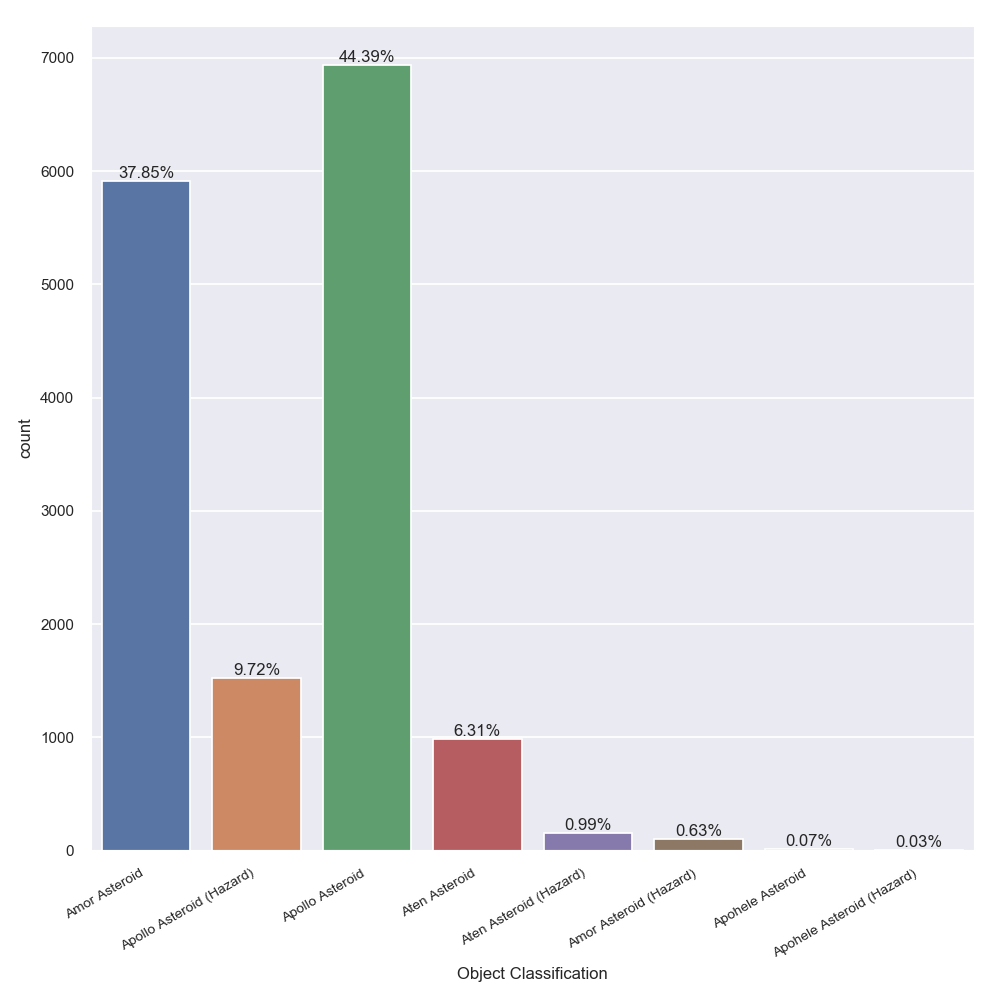

In [582]:
ncount = len(data)
plt.figure(figsize=(8,8))
ax = sns.countplot(data=data, x = 'Object Classification')
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 8, rotation=30, ha="right")
plt.tight_layout()
plt.show()
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y),ha='center', va='bottom')

In [478]:
#creating new dataframe with classes that we are going to use for classification
d1 = data[data['Object Classification']=='Apollo Asteroid'].sample(n=2100, random_state=1)
d2 = data[data['Object Classification']=='Amor Asteroid'].sample(n=2050, random_state=1)
d3 = data[data['Object Classification']=='Aten Asteroid']
d = pd.concat([d1,d2,d3])
#convert object target column to numeric where Apollo=1, Amor=2,Aten=3
d['Object Classification'] = pd.factorize(d['Object Classification'])[0] + 1

5137

In [481]:
#splitting dataframe into minority and majority classes
a = d[d['Object Classification']==1]
b = d[d['Object Classification']==2]
df_majority = pd.concat([a,b])
df_minority = d[d['Object Classification']==3]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=2100,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df['Object Classification'].value_counts()
#plt.figure(figsize=(10, 10))
#sns.countplot(x= "Object Classification", data = df_upsampled)
df.shape

(6250, 14)

In [607]:
df['Epoch (TDB)'].max() - df['Epoch (TDB)'].min()

9263

<IPython.core.display.Javascript object>


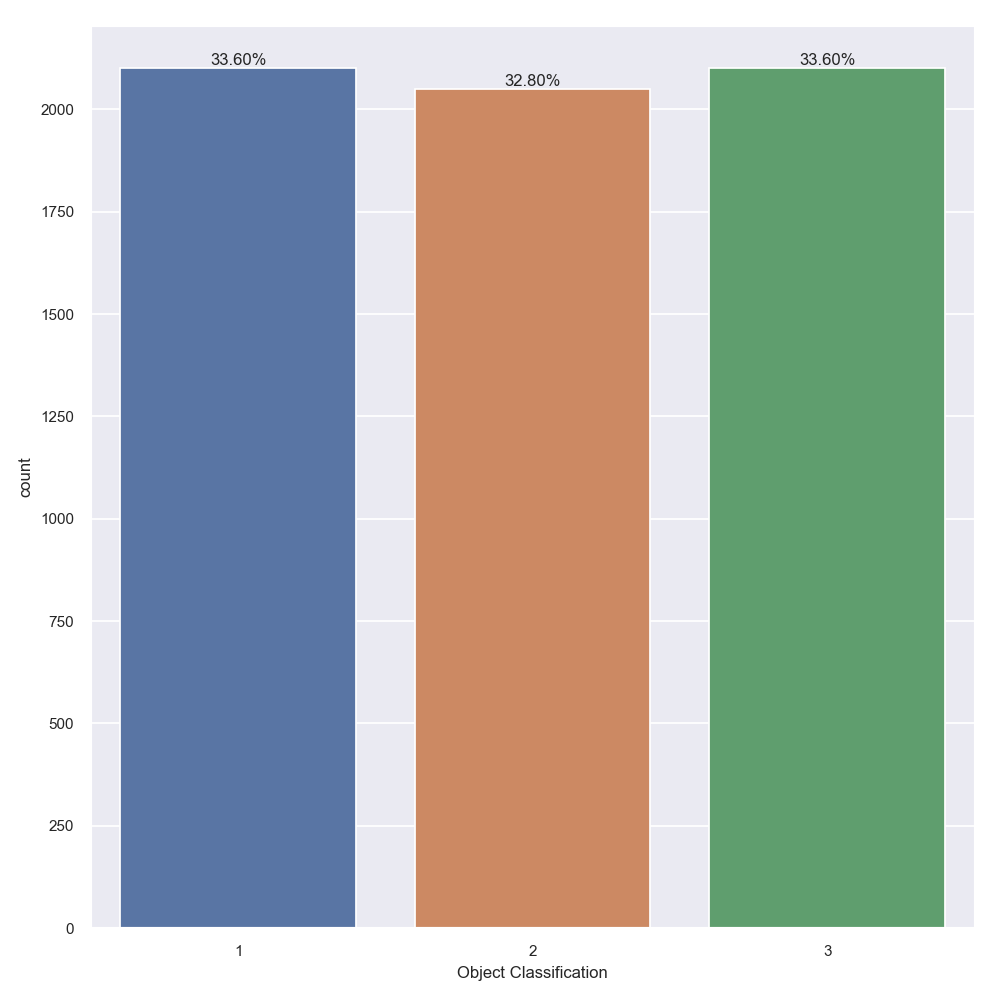

In [585]:
ncount = len(df)
plt.figure(figsize=(8,8))
ax = sns.countplot(data=df, x = 'Object Classification')
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()
plt.show()
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y),ha='center', va='bottom')

<IPython.core.display.Javascript object>


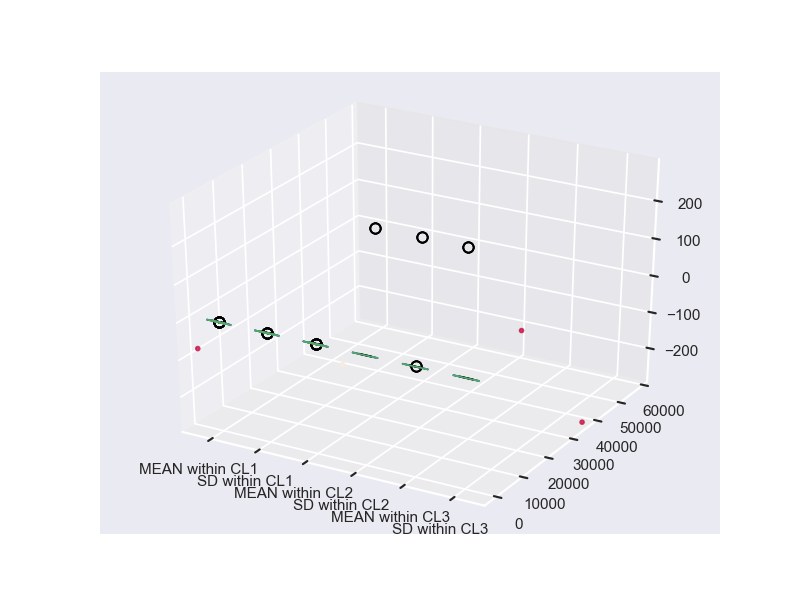

In [586]:
d_pca = df.copy()
labels = d_pca['Object Classification']
pca = PCA(n_components = 3)
PC = pca.fit_transform(d_pca)
PCdf = pd.DataFrame(data = PC, columns=['PC1', 'PC2', 'PC3'])
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
pca_plot = ax.scatter(PCdf['PC1'], PCdf['PC2'], PCdf['PC3'], c=labels, marker='o', s = 5)

<IPython.core.display.Javascript object>


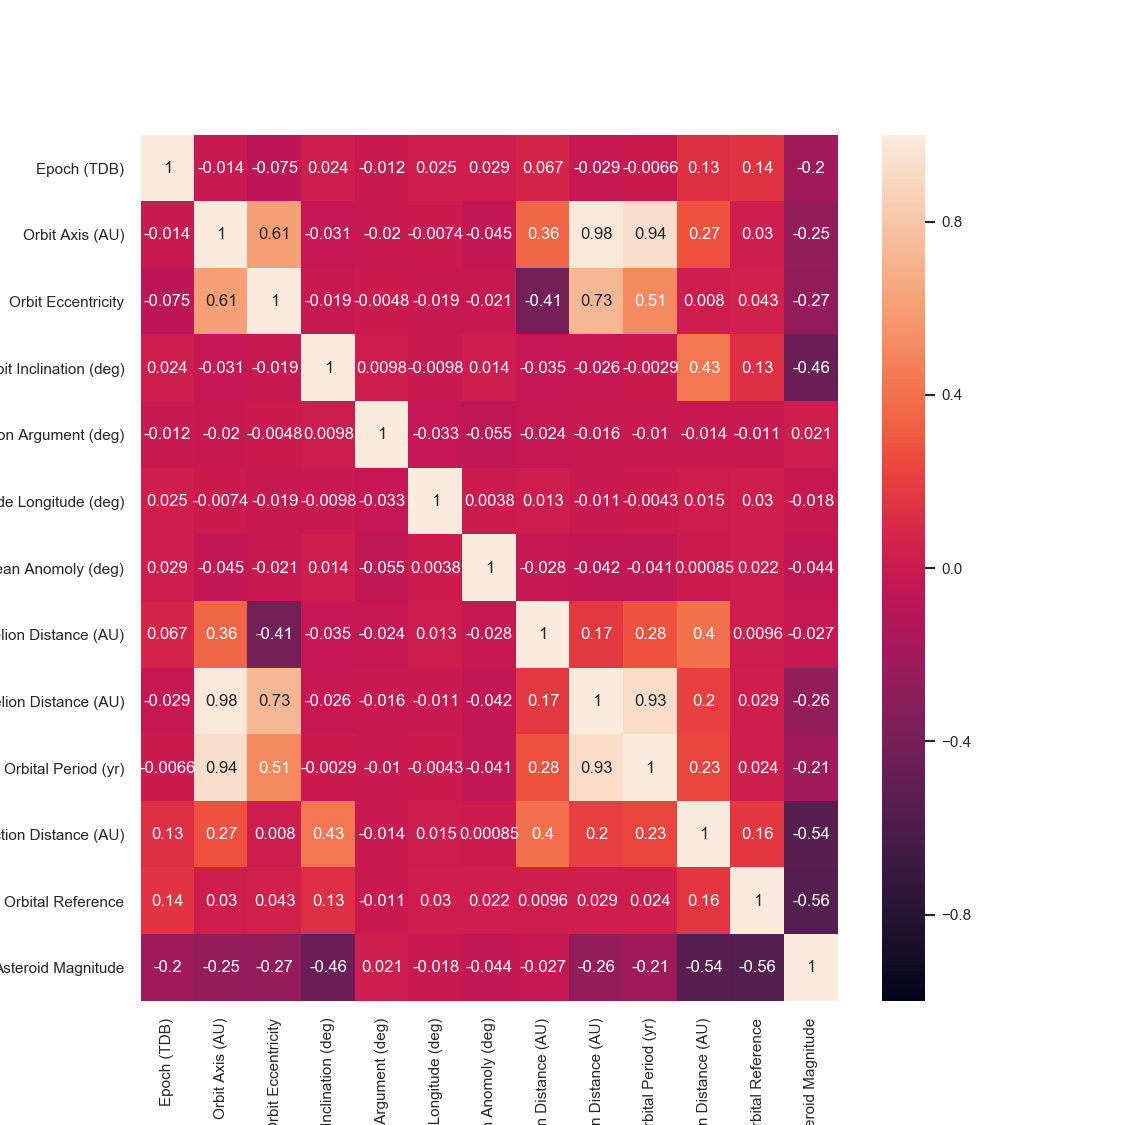

In [581]:
plt.figure(figsize=(9, 9))
sns.set(font_scale=0.8)
ax = sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)

In [602]:
CL1 = df[df['Object Classification']==1]
CL2 = df[df['Object Classification']==2]
CL3 = df[df['Object Classification']==3]

mean_sd = pd.concat([CL1.mean(),CL1.std(ddof=1),CL2.mean(),CL2.std(ddof=1),
                     CL3.mean(),CL3.std(ddof=1)],axis=1)
mean_sd.columns = ['MEAN within CL1','SD within CL1',
                   'MEAN within CL2','SD within CL2',
                   'MEAN within CL3','SD within CL3']
mean_sd = mean_sd.drop(['Object Classification', 'Epoch (TDB)'])
mean_sd

,MEAN within CL1,SD within CL1,MEAN within CL2,SD within CL2,MEAN within CL3,SD within CL3
Orbit Axis (AU),1.717459,0.506741,2.032094,0.502301,0.893628,0.076663
Orbit Eccentricity,0.490804,0.182429,0.407385,0.144280,0.325354,0.159294
Orbit Inclination (deg),11.915625,10.975237,14.035269,11.324926,12.657247,10.486209
Perihelion Argument (deg),184.552684,101.612206,177.281724,105.721346,190.686991,110.885456
Node Longitude (deg),173.452684,104.397113,175.442376,103.042422,171.397277,105.875158
Mean Anomoly (deg),171.524908,120.236611,170.508957,116.342891,185.071081,100.492919
Perihelion Distance (AU),0.806897,0.186690,1.136672,0.083328,0.608321,0.170202
Aphelion Distance (AU),2.628081,1.026458,2.927502,0.983435,1.178976,0.137137
Orbital Period (yr),2.322843,1.039875,2.963010,1.089092,0.847224,0.106645
Minimum Orbit Intersection Distance (AU),0.063936,0.083813,0.177772,0.108099,0.055248,0.064571


<IPython.core.display.Javascript object>


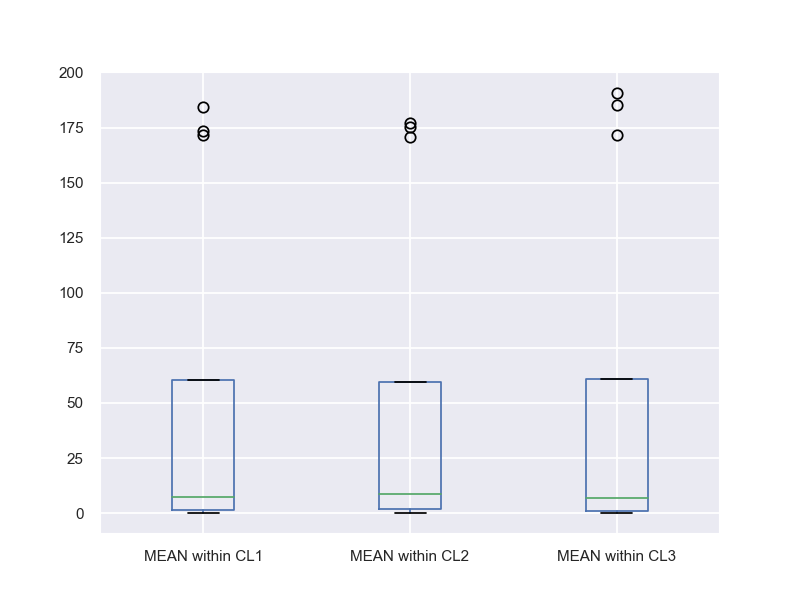

In [603]:
sd_plot = mean_sd[['MEAN within CL1', 'MEAN within CL2', 'MEAN within CL3']]
fig = plt.figure()
ax = fig.add_subplot(111)
sdPLOT = sd_plot.boxplot()

<IPython.core.display.Javascript object>


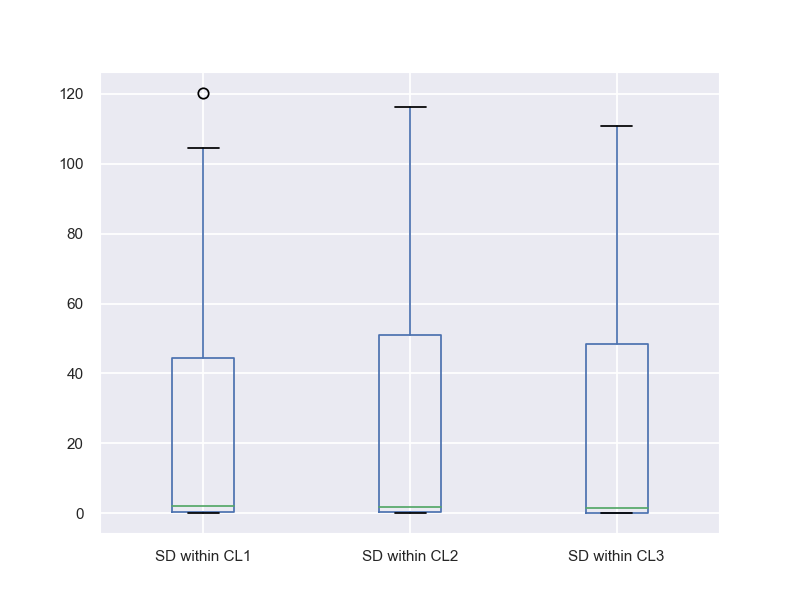

In [604]:
sd_plot = mean_sd[['SD within CL1', 'SD within CL2', 'SD within CL3']]
fig = plt.figure()
ax = fig.add_subplot(111)
sdPLOT = sd_plot.boxplot()

In [444]:
#drop target variable and store it as variable y before scale data
dff = df.drop('Object Classification', axis = 1)
Y = df['Object Classification']

In [493]:
#convert dataframe dtype to float, scale features (axis = 0 means scale by column)
dff = dff.astype(float)
df_sc = pd.DataFrame(preprocessing.scale(dff, axis = 0))
Y = Y.reset_index(drop=True)
df_sc['Y'] = Y

In [494]:
#separate classes
CL1 = df_sc[df_sc['Y']==1]
CL2 = df_sc[df_sc['Y']==2]
CL3 = df_sc[df_sc['Y']==3]

In [495]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(CL1.iloc[:,0:13], CL1.iloc[:,13], test_size=0.2, random_state=3)
x_train2, x_test2, y_train2, y_test2 = train_test_split(CL2.iloc[:,0:13], CL2.iloc[:,13], test_size=0.2, random_state=3)
x_train3, x_test3, y_train3, y_test3 = train_test_split(CL3.iloc[:,0:13], CL3.iloc[:,13], test_size=0.2, random_state=3)

In [496]:
print(x_train1.shape, y_train1.shape)
print(x_test1.shape, y_test1.shape)

(1680, 13) (1680,)
(420, 13) (420,)


In [497]:
print(x_train2.shape, y_train2.shape)
print(x_test2.shape, y_test2.shape)

(1640, 13) (1640,)
(410, 13) (410,)


In [498]:
print(x_train3.shape, y_train3.shape)
print(x_test3.shape, y_test3.shape)

(1680, 13) (1680,)
(420, 13) (420,)


In [499]:
x_train = pd.concat([x_train1,x_train2,x_train3])
x_test = pd.concat([x_test1,x_test2, x_test3])
y_train = pd.concat([y_train1,y_train2, y_train3])
y_test = pd.concat([y_test1,y_test2, y_test3])
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 13) (5000,)
(1250, 13) (1250,)


## Identifying train and test sets for CL1 vs CL2

In [500]:
x_train_12 = pd.concat([x_train1,x_train2])
x_test_12 = pd.concat([x_test1,x_test2])
y_train_12 = pd.concat([y_train1,y_train2])
y_test_12 = pd.concat([y_test1,y_test2])
print(x_train_12.shape, y_train_12.shape)
print(x_test_12.shape, y_test_12.shape)

(3320, 13) (3320,)
(830, 13) (830,)


Identifying train and test sets for CL1 vs CL3

In [501]:
x_train_13 = pd.concat([x_train1,x_train3])
x_test_13 = pd.concat([x_test1,x_test3])
y_train_13 = pd.concat([y_train1,y_train3])
y_test_13 = pd.concat([y_test1,y_test3])
print(x_train_13.shape, y_train_13.shape)
print(x_test_13.shape, y_test_13.shape)

(3360, 13) (3360,)
(840, 13) (840,)


Identifying train and test sets for CL2 vs CL3

In [502]:
x_train_23 = pd.concat([x_train2,x_train3])
x_test_23 = pd.concat([x_test2,x_test3])
y_train_23 = pd.concat([y_train2,y_train3])
y_test_23 = pd.concat([y_test2,y_test3])
print(x_train_23.shape, y_train_23.shape)
print(x_test_23.shape, y_test_23.shape)

(3320, 13) (3320,)
(830, 13) (830,)


## Search for best parameters

In [452]:
#function to run svm on train/test set and get all otputs we need such as number of support 
#vectors/tario/accuracy/error/confidence interval on accuracy and error and confusion matrices on train and test set
def svm_cl(xtr, ytr, xts, yts, c, gamma):
    m = SVC(kernel = 'rbf', C = c, gamma = gamma, random_state = 3)
    m.fit(xtr, ytr)
    y_pred_tr = m.predict(xtr)
    S = m.support_.size
    ratio = round(S/len(xtr), 2)
    PredTrain = round(accuracy_score(ytr, y_pred_tr), 4)
    print('Number S of support vectors for Radial Kernel: ', S)
    print('Ratio of support vectors for Radial Kernel: ', ratio, '\n')
    print(pd.crosstab(ytr, y_pred_tr, rownames=['True class'], colnames=['Predicted class'], margins=True) ,'\n', '\n')
    print(pd.crosstab(ytr, y_pred_tr, rownames=['True class'], colnames=['Predicted class']).apply(lambda r: round(r/r.sum(),4), axis=1), '\n','\n')
    print('Percentages of correct prediction for Train set:', PredTrain )
    trp = round(PredTrain + 1.96*(np.sqrt(PredTrain*(1 - PredTrain))/np.sqrt(len(xtr))), 4)
    trm = round(PredTrain - 1.96*(np.sqrt(PredTrain*(1 - PredTrain))/np.sqrt(len(xtr))), 4)
    print('Confidence Interval for Train set is: (', trp, ';', trm, ')', '\n')
    mscltr = 1 - PredTrain
    cler_ptr = round(mscltr + 1.96*(np.sqrt(mscltr*(1 - mscltr))/np.sqrt(len(xts))), 4)
    cler_mtr = round(mscltr - 1.96*(np.sqrt(mscltr*(1 - mscltr))/np.sqrt(len(xts))), 4)
    print('Classification Error for the Train set:', round(mscltr, 4))
    print('Confidence Interval of the classification errors for Train set is: (', cler_mtr, ';', cler_ptr, ')', '\n')
    print('________________________________________________________________________________', '\n')
    y_pred_ts = m.predict(xts)
    print(pd.crosstab(yts, y_pred_ts, rownames=['True class'], colnames=['Predicted class'], margins=True),'\n','\n')
    print(pd.crosstab(yts, y_pred_ts, rownames=['True class'], colnames=['Predicted class']).apply(lambda r: round(r/r.sum(),4), axis=1), '\n','\n')
    PredTest = round(accuracy_score(yts, y_pred_ts), 4)
    print('Percentages of correct prediction for Test set:', PredTest)
    tsp = round(PredTest + 1.96*(np.sqrt(PredTest*(1 - PredTest))/np.sqrt(len(xtr))), 4)
    tsm = round(PredTest - 1.96*(np.sqrt(PredTest*(1 - PredTest))/np.sqrt(len(xtr))), 4)
    print('Confidence Interval for Test set is: (', tsp, ';', tsm, ')', '\n')
    msclts = 1 - PredTest
    cler_pts = round(msclts + 1.96*(np.sqrt(msclts*(1 - msclts))/np.sqrt(len(xts))), 4)
    cler_mts = round(msclts - 1.96*(np.sqrt(msclts*(1 - msclts))/np.sqrt(len(xts))), 4)
    print('Classification Error for the Test set:', round(msclts, 4))
    print('Confidence Interval of the classification errors for Test set is: (', cler_mts, ';', cler_pts, ')', '\n')

In [505]:
#tuning function for find the best parameters for Radial Kernel
def svc_param_selection(X, y, nfolds):
    Cs = [5, 7, 10, 15]
    gammas = [0.01, 0.1, 0.25, 0.5]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [506]:
print('The best value of parameters for Train Set (CL1vsCL2)', svc_param_selection(x_train_12, y_train_12, 10))

The best value of parameters for Train Set (CL1vsCL2) {'C': 15, 'gamma': 0.01}


In [508]:
svm_cl(x_train_12, y_train_12, x_test_12, y_test_12, 15, 0.01)

Number S of support vectors for Radial Kernel:  502
Ratio of support vectors for Radial Kernel:  0.15 

Predicted class     1     2   All
True class                       
1                1653    27  1680
2                  22  1618  1640
All              1675  1645  3320 
 

Predicted class       1       2
True class                     
1                0.9839  0.0161
2                0.0134  0.9866 
 

Percentages of correct prediction for Train set: 0.9852
Confidence Interval for Train set is: ( 0.9893 ; 0.9811 ) 

Classification Error for the Train set: 0.0148
Confidence Interval of the classification errors for Train set is: ( 0.0066 ; 0.023 ) 

________________________________________________________________________________ 

Predicted class    1    2  All
True class                    
1                412    8  420
2                 10  400  410
All              422  408  830 
 

Predicted class       1       2
True class                     
1                0.9810  0.0190
2

In [509]:
print('The best value of parameters for Train Set (CL1vsCL3)', svc_param_selection(x_train_13, y_train_13, 10))

The best value of parameters for Train Set (CL1vsCL3) {'C': 15, 'gamma': 0.1}


In [512]:
svm_cl(x_train_13, y_train_13, x_test_13, y_test_13, 15, 0.1)

Number S of support vectors for Radial Kernel:  313
Ratio of support vectors for Radial Kernel:  0.09 

Predicted class     1     3   All
True class                       
1                1677     3  1680
3                   0  1680  1680
All              1677  1683  3360 
 

Predicted class       1       3
True class                     
1                0.9982  0.0018
3                0.0000  1.0000 
 

Percentages of correct prediction for Train set: 0.9991
Confidence Interval for Train set is: ( 1.0001 ; 0.9981 ) 

Classification Error for the Train set: 0.0009
Confidence Interval of the classification errors for Train set is: ( -0.0011 ; 0.0029 ) 

________________________________________________________________________________ 

Predicted class    1    3  All
True class                    
1                412    8  420
3                  2  418  420
All              414  426  840 
 

Predicted class       1       3
True class                     
1                0.9810  0.0190

In [511]:
print('The best value of parameters for Train Set (CL2vsCL3)', svc_param_selection(x_train_23, y_train_23, 10))

The best value of parameters for Train Set (CL2vsCL3) {'C': 5, 'gamma': 0.01}


In [513]:
svm_cl(x_train_23, y_train_23, x_test_23, y_test_23, 5, 0.01)

Number S of support vectors for Radial Kernel:  88
Ratio of support vectors for Radial Kernel:  0.03 

Predicted class     2     3   All
True class                       
2                1640     0  1640
3                   0  1680  1680
All              1640  1680  3320 
 

Predicted class    2    3
True class               
2                1.0  0.0
3                0.0  1.0 
 

Percentages of correct prediction for Train set: 1.0
Confidence Interval for Train set is: ( 1.0 ; 1.0 ) 

Classification Error for the Train set: 0.0
Confidence Interval of the classification errors for Train set is: ( 0.0 ; 0.0 ) 

________________________________________________________________________________ 

Predicted class    2    3  All
True class                    
2                410    0  410
3                  0  420  420
All              410  420  830 
 

Predicted class    2    3
True class               
2                1.0  0.0
3                0.0  1.0 
 

Percentages of correct predicti

In [520]:
#function to run svm on train/test set and get all otputs we need such as number of support 
#vectors/tario/accuracy/error/confidence interval on accuracy and error and confusion matrices on train and test set
def svm_cl_r(xtr, xts, ytr, yts, c, gamma):
    m = SVC(kernel = 'rbf', C = c, gamma = gamma, random_state = 3)
    m.fit(xtr, ytr)
    y_pred_tr = m.predict(xtr)
    S = m.support_.size
    ratio = round(S/len(xtr), 2)
    PredTrain = round(accuracy_score(ytr, y_pred_tr), 4)
    print('Number S of support vectors for Radial Kernel: ', S)
    print('Ratio of support vectors for Radial Kernel: ', ratio, '\n')
    print(pd.crosstab(ytr, y_pred_tr, rownames=['True class'], colnames=['Predicted class'], margins=True) ,'\n', '\n')
    global conf_m_tr
    conf_m_tr = pd.crosstab(ytr, y_pred_tr, rownames=['True class'], colnames=['Predicted class']).apply(lambda r: round(r/r.sum(),4), axis=1)
    print(conf_m_tr, '\n','\n')
    print('Percentages of correct prediction for Train set:', PredTrain )
    trp = round(PredTrain + 1.96*(np.sqrt(PredTrain*(1 - PredTrain))/np.sqrt(len(xtr))), 4)
    trm = round(PredTrain - 1.96*(np.sqrt(PredTrain*(1 - PredTrain))/np.sqrt(len(xtr))), 4)
    print('Confidence Interval for Train set is: (', trm, ';', trp, ')', '\n')
    mscltr = 1 - PredTrain
    cler_mtr = round(mscltr - 1.96*(np.sqrt(mscltr*(1 - mscltr))/np.sqrt(len(xts))), 4)
    cler_ptr = round(mscltr + 1.96*(np.sqrt(mscltr*(1 - mscltr))/np.sqrt(len(xts))), 4)
    print('Classification Error for the Train set:', round(mscltr, 4))
    print('Confidence Interval of the classification errors for Train set is: (', cler_mtr, ';', cler_ptr, ')', '\n')
    print('________________________________________________________________________________', '\n')
    y_pred_ts = m.predict(xts)
    print(pd.crosstab(yts, y_pred_ts, rownames=['True class'], colnames=['Predicted class'], margins=True),'\n','\n')
    global conf_m_ts
    conf_m_ts = pd.crosstab(yts, y_pred_ts, rownames=['True class'], colnames=['Predicted class']).apply(lambda r: round(r/r.sum(),4), axis=1)
    print(conf_m_ts,'\n','\n')
    PredTest = round(accuracy_score(yts, y_pred_ts), 4)
    print('Percentages of correct prediction for Test set:', PredTest)
    tsp = round(PredTest + 1.96*(np.sqrt(PredTest*(1 - PredTest))/np.sqrt(len(xtr))), 4)
    tsm = round(PredTest - 1.96*(np.sqrt(PredTest*(1 - PredTest))/np.sqrt(len(xtr))), 4)
    print('Confidence Interval for Test set is: (', tsm, ';', tsp, ')', '\n')
    msclts = 1 - PredTest
    cler_mts = round(msclts - 1.96*(np.sqrt(msclts*(1 - msclts))/np.sqrt(len(xts))), 4)
    cler_pts = round(msclts + 1.96*(np.sqrt(msclts*(1 - msclts))/np.sqrt(len(xts))), 4)
    print('Classification Error for the Test set:', round(msclts, 4))
    print('Confidence Interval of the classification errors for Test set is: (', cler_mts, ';', cler_pts, ')', '\n')

## SVM classification by radial kernel 

In [521]:
#classification CL1 vs(not CL1) with best parameters
#identifying new classes 1 and 0
#copy of target column and replace it using dictionary with CL1 = 1 and CL2/CL3 = 0 instead of CL1,CL2,VL3 = 1,2,3
y = df_sc['Y'].copy()
cl = {1: 1, 2: 0, 3: 0 }
y.replace(cl, inplace = True)
#drop target column from dataframe for splitting to train and test sets
x = df_sc.drop(['Y'], axis=1)
#splitting to train and test set converted y and x
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x, y, test_size=0.2, random_state=3)
#call function of svm
svm_cl_r(x_train_1, x_test_1, y_train_1, y_test_1, 15, 0.01)
conf_m_tr1 = conf_m_tr.copy()
conf_m_ts1 = conf_m_ts.copy()

Number S of support vectors for Radial Kernel:  1385
Ratio of support vectors for Radial Kernel:  0.28 

Predicted class     0     1   All
True class                       
0                3250    82  3332
1                 233  1435  1668
All              3483  1517  5000 
 

Predicted class       0       1
True class                     
0                0.9754  0.0246
1                0.1397  0.8603 
 

Percentages of correct prediction for Train set: 0.937
Confidence Interval for Train set is: ( 0.9303 ; 0.9437 ) 

Classification Error for the Train set: 0.063
Confidence Interval of the classification errors for Train set is: ( 0.0495 ; 0.0765 ) 

________________________________________________________________________________ 

Predicted class    0    1   All
True class                     
0                801   17   818
1                 73  359   432
All              874  376  1250 
 

Predicted class       0       1
True class                     
0                0.9792  0.0

In [516]:
#classification CL2 vs(not CL2) with best parameters
y = df_sc['Y'].copy()
cl = {1: 0, 2: 1, 3: 0 }
y.replace(cl, inplace = True)
#drop target column from dataframe for splitting to train and test sets
x = df_sc.drop(['Y'], axis=1)

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x, y, test_size=0.2, random_state=3)
svm_cl_r(x_train_2, x_test_2, y_train_2, y_test_2, 15, 0.01)
conf_m_tr2 = conf_m_tr.copy()
conf_m_ts2 = conf_m_ts.copy()

Number S of support vectors for Radial Kernel:  504
Ratio of support vectors for Radial Kernel:  0.1 

Predicted class     0     1   All
True class                       
0                3312    35  3347
1                  16  1637  1653
All              3328  1672  5000 
 

Predicted class       0       1
True class                     
0                0.9895  0.0105
1                0.0097  0.9903 
 

Percentages of correct prediction for Train set: 0.9898
Confidence Interval for Train set is: ( 0.9926 ; 0.987 ) 

Classification Error for the Train set: 0.0102
Confidence Interval of the classification errors for Train set is: ( 0.0046 ; 0.0158 ) 

________________________________________________________________________________ 

Predicted class    0    1   All
True class                     
0                844    9   853
1                  4  393   397
All              848  402  1250 
 

Predicted class       0       1
True class                     
0                0.9894  0.01

In [517]:
#classification CL3 vs(not CL3) with best parameters
y = df_sc['Y'].copy()
cl = {1: 0, 2: 0, 3: 1 }
y.replace(cl, inplace = True)
#drop target column from dataframe for splitting to train and test sets
x = df_sc.drop(['Y'], axis=1)
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x, y, test_size=0.2, random_state=3)
svm_cl_r(x_train_3, x_test_3, y_train_3, y_test_3, 15, 0.01)
conf_m_tr3 = conf_m_tr.copy()
conf_m_ts3 = conf_m_ts.copy()

Number S of support vectors for Radial Kernel:  270
Ratio of support vectors for Radial Kernel:  0.05 

Predicted class     0     1   All
True class                       
0                3295    26  3321
1                   0  1679  1679
All              3295  1705  5000 
 

Predicted class       0       1
True class                     
0                0.9922  0.0078
1                0.0000  1.0000 
 

Percentages of correct prediction for Train set: 0.9948
Confidence Interval for Train set is: ( 0.9968 ; 0.9928 ) 

Classification Error for the Train set: 0.0052
Confidence Interval of the classification errors for Train set is: ( 0.0012 ; 0.0092 ) 

________________________________________________________________________________ 

Predicted class    0    1   All
True class                     
0                814   15   829
1                  0  421   421
All              814  436  1250 
 

Predicted class       0       1
True class                     
0                0.9819  0.

## SVM classification using a polynomial kernel 

In [253]:
#function to run svm on train/test set and get all otputs we need such as number of support 
#vectors/tario/accuracy/error/confidence interval on accuracy and error and confusion matrices on train and test set
def svm_cl_p(xtr, xts, ytr, yts, c):
    m = SVC(kernel = 'poly', C = c, gamma = 'auto', coef0 = 1, random_state = 3)
    m.fit(xtr, ytr)
    y_pred_tr = m.predict(xtr)
    S = m.support_.size
    ratio = round(S/len(xtr), 2)
    PredTrain = round(accuracy_score(ytr, y_pred_tr), 4)
    print('Number S of support vectors for Radial Kernel: ', S)
    print('Ratio of support vectors for Radial Kernel: ', ratio, '\n')
    print(pd.crosstab(ytr, y_pred_tr, rownames=['True class'], colnames=['Predicted class'], margins=True) ,'\n', '\n')
    global conf_m_tr
    conf_m_tr = pd.crosstab(ytr, y_pred_tr, rownames=['True class'], colnames=['Predicted class']).apply(lambda r: round(r/r.sum(),4), axis=1)
    print(conf_m_tr, '\n','\n')
    print('Percentages of correct prediction for Train set:', PredTrain )
    trp = round(PredTrain + 1.96*(np.sqrt(PredTrain*(1 - PredTrain))/np.sqrt(len(xtr))), 4)
    trm = round(PredTrain - 1.96*(np.sqrt(PredTrain*(1 - PredTrain))/np.sqrt(len(xtr))), 4)
    print('Confidence Interval for Train set is: (', trp, ';', trm, ')', '\n')
    mscltr = 1 - PredTrain
    cler_mtr = round(mscltr - 1.96*(np.sqrt(mscltr*(1 - mscltr))/np.sqrt(len(xts))), 4)
    cler_ptr = round(mscltr + 1.96*(np.sqrt(mscltr*(1 - mscltr))/np.sqrt(len(xts))), 4)
    print('Classification Error for the Train set:', round(mscltr, 4))
    print('Confidence Interval of the classification errors for Train set is: (', cler_mtr, ';', cler_ptr, ')', '\n')
    print('________________________________________________________________________________', '\n')
    y_pred_ts = m.predict(xts)
    print(pd.crosstab(yts, y_pred_ts, rownames=['True class'], colnames=['Predicted class'], margins=True),'\n','\n')
    global conf_m_ts
    conf_m_ts = pd.crosstab(yts, y_pred_ts, rownames=['True class'], colnames=['Predicted class']).apply(lambda r: round(r/r.sum(),4), axis=1)
    print(conf_m_ts,'\n','\n')
    PredTest = round(accuracy_score(yts, y_pred_ts), 4)
    print('Percentages of correct prediction for Test set:', PredTest)
    tsp = round(PredTest + 1.96*(np.sqrt(PredTest*(1 - PredTest))/np.sqrt(len(xtr))), 4)
    tsm = round(PredTest - 1.96*(np.sqrt(PredTest*(1 - PredTest))/np.sqrt(len(xtr))), 4)
    print('Confidence Interval for Test set is: (', tsp, ';', tsm, ')', '\n')
    msclts = 1 - PredTest
    cler_mts = round(msclts - 1.96*(np.sqrt(msclts*(1 - msclts))/np.sqrt(len(xts))), 4)
    cler_pts = round(msclts + 1.96*(np.sqrt(msclts*(1 - msclts))/np.sqrt(len(xts))), 4)
    print('Classification Error for the Test set:', round(msclts, 4))
    print('Confidence Interval of the classification errors for Test set is: (', cler_mts, ';', cler_pts, ')', '\n')

In [234]:
def svc_param_selection(X, y, nfolds):
    Cs = [5, 7, 10, 15, 30]
    param_grid = {'C': Cs}
    grid_search = GridSearchCV(SVC(kernel='poly', degree = 2, gamma = 'auto', coef0 = 1), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [235]:
print('The best value of parameters for Train Set (CL1vsCL2)', svc_param_selection(x_train_12, y_train_12, 10))

The best value of parameters for Train Set (CL1vsCL2) {'C': 30}


In [247]:
svm_cl_p(x_train_12, x_test_12, y_train_12, y_test_12, 30)

Number S of support vectors for Radial Kernel:  181
Ratio of support vectors for Radial Kernel:  0.05 

Predicted class     1     2   All
True class                       
1                1679     1  1680
2                   1  1639  1640
All              1680  1640  3320 
 

Predicted class       1       2
True class                     
1                0.9994  0.0006
2                0.0006  0.9994 
 

Percentages of correct prediction for Train set: 0.9994
Confidence Interval for Train set is: ( 1.0002 ; 0.9986 ) 

Classification Error for the Train set: 0.0006
Confidence Interval of the classification errors for Train set is: ( -0.0011 ; 0.0023 ) 

________________________________________________________________________________ 

Predicted class    1    2  All
True class                    
1                413    7  420
2                 14  396  410
All              427  403  830 
 

Predicted class       1       2
True class                     
1                0.9833  0.0167

In [242]:
print('The best value of parameters for Train Set (CL1vsCL3)', svc_param_selection(x_train_13, y_train_13, 10))

The best value of parameters for Train Set (CL1vsCL3) {'C': 30}


In [248]:
svm_cl_p(x_train_13, x_test_13, y_train_13, y_test_13, 30)

Number S of support vectors for Radial Kernel:  108
Ratio of support vectors for Radial Kernel:  0.03 

Predicted class     1     3   All
True class                       
1                1680     0  1680
3                   0  1680  1680
All              1680  1680  3360 
 

Predicted class    1    3
True class               
1                1.0  0.0
3                0.0  1.0 
 

Percentages of correct prediction for Train set: 1.0
Confidence Interval for Train set is: ( 1.0 ; 1.0 ) 

Classification Error for the Train set: 0.0
Confidence Interval of the classification errors for Train set is: ( 0.0 ; 0.0 ) 

________________________________________________________________________________ 

Predicted class    1    3  All
True class                    
1                417    3  420
3                  2  418  420
All              419  421  840 
 

Predicted class       1       3
True class                     
1                0.9929  0.0071
3                0.0048  0.9952 
 

Percen

In [238]:
print('The best value of parameters for Train Set (CL2vsCL3)', svc_param_selection(x_train_23, y_train_23, 10))

The best value of parameters for Train Set (CL2vsCL3) {'C': 15}


In [249]:
svm_cl_p(x_train_23, x_test_23, y_train_23, y_test_23, 15)

Number S of support vectors for Radial Kernel:  29
Ratio of support vectors for Radial Kernel:  0.01 

Predicted class     2     3   All
True class                       
2                1640     0  1640
3                   0  1680  1680
All              1640  1680  3320 
 

Predicted class    2    3
True class               
2                1.0  0.0
3                0.0  1.0 
 

Percentages of correct prediction for Train set: 1.0
Confidence Interval for Train set is: ( 1.0 ; 1.0 ) 

Classification Error for the Train set: 0.0
Confidence Interval of the classification errors for Train set is: ( 0.0 ; 0.0 ) 

________________________________________________________________________________ 

Predicted class    2    3  All
True class                    
2                409    1  410
3                  0  420  420
All              409  421  830 
 

Predicted class       2       3
True class                     
2                0.9976  0.0024
3                0.0000  1.0000 
 

Percent

In [255]:
#classification CL1 vs(not CL1) with best parameters
y = df_sc['Y'].copy()
cl = {1: 1, 2: 0, 3: 0 }
y.replace(cl, inplace = True)
#drop target column from dataframe for splitting to train and test sets
x = df_sc.drop(['Y'], axis=1)
#splitting to train and test set converted y and x
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x, y, test_size=0.2, random_state=3)
#call function of svm
svm_cl_p(x_train_1, x_test_1, y_train_1, y_test_1, 30)
conf_m_tr1 = conf_m_tr.copy()
conf_m_ts1 = conf_m_ts.copy()

Number S of support vectors for Radial Kernel:  400
Ratio of support vectors for Radial Kernel:  0.08 

Predicted class     0     1   All
True class                       
0                3327     5  3332
1                  17  1651  1668
All              3344  1656  5000 
 

Predicted class       0       1
True class                     
0                0.9985  0.0015
1                0.0102  0.9898 
 

Percentages of correct prediction for Train set: 0.9956
Confidence Interval for Train set is: ( 0.9974 ; 0.9938 ) 

Classification Error for the Train set: 0.0044
Confidence Interval of the classification errors for Train set is: ( 0.0007 ; 0.0081 ) 

________________________________________________________________________________ 

Predicted class    0    1   All
True class                     
0                808   10   818
1                 21  411   432
All              829  421  1250 
 

Predicted class       0       1
True class                     
0                0.9878  0.

In [256]:
#classification CL2 vs(not CL2) with best parameters
y = df_sc['Y'].copy()
cl = {1: 0, 2: 1, 3: 0 }
y.replace(cl, inplace = True)
#drop target column from dataframe for splitting to train and test sets
x = df_sc.drop(['Y'], axis=1)

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x, y, test_size=0.2, random_state=3)
svm_cl_p(x_train_2, x_test_2, y_train_2, y_test_2, 30)
conf_m_tr1 = conf_m_tr.copy()
conf_m_ts1 = conf_m_ts.copy()

Number S of support vectors for Radial Kernel:  195
Ratio of support vectors for Radial Kernel:  0.04 

Predicted class     0     1   All
True class                       
0                3344     3  3347
1                   0  1653  1653
All              3344  1656  5000 
 

Predicted class       0       1
True class                     
0                0.9991  0.0009
1                0.0000  1.0000 
 

Percentages of correct prediction for Train set: 0.9994
Confidence Interval for Train set is: ( 1.0001 ; 0.9987 ) 

Classification Error for the Train set: 0.0006
Confidence Interval of the classification errors for Train set is: ( -0.0008 ; 0.002 ) 

________________________________________________________________________________ 

Predicted class    0    1   All
True class                     
0                843   10   853
1                  6  391   397
All              849  401  1250 
 

Predicted class       0       1
True class                     
0                0.9883  0.

In [543]:
#classification CL3 vs(not CL2) with best parameters
y = df_sc['Y'].copy()
cl = {1: 0, 2: 0, 3: 1 }
y.replace(cl, inplace = True)
#drop target column from dataframe for splitting to train and test sets
x = df_sc.drop(['Y'], axis=1)
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x, y, test_size=0.2, random_state=3)
svm_cl_p(x_train_3, x_test_3, y_train_3, y_test_3, 30)
conf_m_tr3 = conf_m_tr.copy()
conf_m_ts3 = conf_m_ts.copy()

Number S of support vectors for Radial Kernel:  114
Ratio of support vectors for Radial Kernel:  0.02 

Predicted class     0     1   All
True class                       
0                3321     0  3321
1                   0  1679  1679
All              3321  1679  5000 
 

Predicted class    0    1
True class               
0                1.0  0.0
1                0.0  1.0 
 

Percentages of correct prediction for Train set: 1.0
Confidence Interval for Train set is: ( 1.0 ; 1.0 ) 

Classification Error for the Train set: 0.0
Confidence Interval of the classification errors for Train set is: ( 0.0 ; 0.0 ) 

________________________________________________________________________________ 

Predicted class    0    1   All
True class                     
0                819   10   829
1                  1  420   421
All              820  430  1250 
 

Predicted class       0       1
True class                     
0                0.9879  0.0121
1                0.0024  0.9976 
 

P

In [ ]:
#combining classification on all cases
maxvoting_tr = []
for i in range(len(y_pred_train1)):
    v1,v2,v3,vote = [],[],[],[]
    if y_pred_train1[i] == 0:
        v1 = [0, 0.5*conf_m_tr_cl1[0][0], 0.5*conf_m_tr_cl1[0][0]]
    if y_pred_train1[i] == 1:
        v1 = [conf_m_tr_cl1[1][1],0,0]
    if y_pred_train2[i] == 0:
        v2 = [0.5*conf_m_tr_cl2[0][0],0, 0.5*conf_m_tr_cl2[0][0]]
    if y_pred_train2[i] == 1:
        v2 = [0,conf_m_tr_cl2[1][1],0]
    if y_pred_train3[i] == 0:
        v3 = [0.5*conf_m_tr_cl3[0][0], 0.5*conf_m_tr_cl3[0][0],0]
    if y_pred_train3[i] == 1:
        v3 = [0, 0, conf_m_tr_cl3[1][1]]
    vote_tr = [sum(x) for x in zip(v1,v2,v3)]
    maxvoting_tr.append(vote_tr.index(max(vote_tr)))

In [ ]:
y_train_temp = y_train.tolist()
y_train_temp = [i-1 for i in y_train_temp]
confusion_train_all = np.zeros((3,3))

In [ ]:
#display result
for j in range(len(maxvoting_tr)):
    confusion_train_all[y_train_temp[j],maxvoting_tr[j]] +=1
confusion_train_all